In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
face_data = pd.read_csv("BIRAFFE-photo/SUB1107-Face.csv", sep=";", 
                        # parse_dates=["GAME-TIMESTAMP"]
                        )
freud_face_data = face_data[face_data['COND'] == "freud"]
freud_face_data = freud_face_data.rename(columns={"GAME-TIMESTAMP": "Timestamp"})
freud_face_data = freud_face_data.round({'Timestamp': 0})
freud_face_data.head()

,COND,Timestamp,PICTURE-TIMESTAMP,IADS-ID,IAPS-ID,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
1140,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.991,0.008,0.0
1141,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.991,0.009,0.0
1142,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.001,0.0,0.0,0.0,0.963,0.036,0.0
1143,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.983,0.017,0.0
1144,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.986,0.014,0.0


In [3]:
game_data = pd.read_json("BIRAFFE-freud/SUB1107-Freud.json", convert_dates=False)
game_data = game_data.round({'Timestamp': 0})
game_data.head(5)

,Timestamp,Game,CountDown,ChangeTo,Key,Player,StartingValue,Slider,Alert,Time,...,RotationW,SpawnPoint,Type,Mechanic,IncreaseTo,Level,Killed,Alpha,Animation,ScoreBoard
0,1.555654e+09,Introduction,Text,Game will start in: 28s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.555654e+09,Introduction,Text,Game will start in: 27s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.555654e+09,Introduction,Text,Game will start in: 26s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.555654e+09,Introduction,Text,Game will start in: 25s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.555654e+09,Introduction,Text,Game will start in: 24s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
face_game_data = game_data.join(freud_face_data, on="Timestamp", rsuffix="_face")
face_game_data.head(4)

,Timestamp,Game,CountDown,ChangeTo,Key,Player,StartingValue,Slider,Alert,Time,...,IADS-ID,IAPS-ID,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
0,1.555654e+09,Introduction,Text,Game will start in: 28s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.555654e+09,Introduction,Text,Game will start in: 27s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.555654e+09,Introduction,Text,Game will start in: 26s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.555654e+09,Introduction,Text,Game will start in: 25s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

face_game_data = pd.merge(game_data, 
                  freud_face_data,
                  left_on='Timestamp',
                  right_on='Timestamp',
                  how='inner')

face_game_data.head(4)


,Timestamp,Game,CountDown,ChangeTo,Key,Player,StartingValue,Slider,Alert,Time,...,IADS-ID,IAPS-ID,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
0,1.555654e+09,Introduction,Text,Game will start in: 28s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.940,0.060,0.0
1,1.555654e+09,Introduction,Text,Game will start in: 27s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.972,0.027,0.0
2,1.555654e+09,Introduction,Text,Game will start in: 26s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.001,0.0,0.0,0.0,0.933,0.067,0.0
3,1.555654e+09,Introduction,Text,Game will start in: 25s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.001,0.0,0.0,0.0,0.918,0.081,0.0


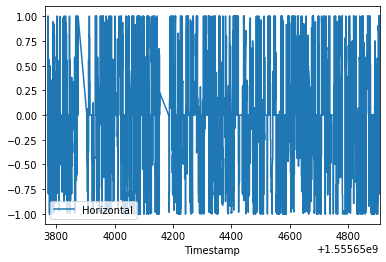

In [26]:
face_game_data[face_game_data['Joystick'] == "Left"].plot(x='Timestamp', y='Horizontal')